In [2]:
#importing libraries.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [4]:
#let's import the data
temp = pd.read_csv("/home/dharmendra/duplicate_datsets/Reviews.csv")
temp1=temp[:5000]
temp1

/home/dharmendra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,ProductId,UserId,reviews.rating,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5.0,delmartian,1,1,5,1303862400,Good Quality Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,B00813GRG4,A1D87F6ZCVE5NK,5.0,dll pa,0,0,1,1346976000,Not as Advertised,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,5.0,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,B000UA0QIQ,A395BORC6FGVXV,4.0,Karl,3,3,2,1307923200,Cough Medicine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,5.0,Twoapennything,0,0,4,1342051200,Nice Taffy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,4.0,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,5.0,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,5.0,R. James,1,1,5,1322006400,Yay Barley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,B00171APVA,A21BT40VZCCYT4,5.0,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
permanent = temp1[['reviews.rating' , 'Text','UserId','Summary']]
permanent.head()

,reviews.rating,Text,UserId,Summary
0,5.0,I have bought several of the Vitality canned d...,A3SGXH7AUHU8GW,Good Quality Dog Food
1,5.0,Product arrived labeled as Jumbo Salted Peanut...,A1D87F6ZCVE5NK,Not as Advertised
2,5.0,This is a confection that has been around a fe...,ABXLMWJIXXAIN,"""Delight"" says it all"
3,4.0,If you are looking for the secret ingredient i...,A395BORC6FGVXV,Cough Medicine
4,5.0,Great taffy at a great price. There was a wid...,A1UQRSCLF8GW1T,Great taffy


In [9]:
print(permanent.isnull().sum()) #Checking for null values

reviews.rating    23
Text               1
UserId             0
Summary            0
dtype: int64


In [10]:
#check null values
check =  permanent[permanent["reviews.rating"].isnull()]
check.head()

,reviews.rating,Text,UserId,Summary
2886,NaN,I find many K-Cups are weak and not what I am ...,A13PNJP7MSZ5FJ,Love this coffee
2887,NaN,"If you love super dark, rich, bold and thick f...",A1SP0JKOZLVYNG,Tastes like...
2888,NaN,"<a href=""http://www.amazon.com/gp/product/B000...",A3M8R4JD1SIS76,Yummy Cookies
2889,NaN,It's very nice that the company put 100 calori...,A2HQ8RTAJYEUJO,3.5* snack for a non-chocophile
2890,NaN,I enjoy them a lot and so does my son. I have ...,A2N17DHJPYFXGI,Peanut Butter Cookies


In [11]:
#filtering non-null values.
senti= permanent[permanent["reviews.rating"].notnull()]
permanent.head()

,reviews.rating,Text,UserId,Summary
0,5.0,I have bought several of the Vitality canned d...,A3SGXH7AUHU8GW,Good Quality Dog Food
1,5.0,Product arrived labeled as Jumbo Salted Peanut...,A1D87F6ZCVE5NK,Not as Advertised
2,5.0,This is a confection that has been around a fe...,ABXLMWJIXXAIN,"""Delight"" says it all"
3,4.0,If you are looking for the secret ingredient i...,A395BORC6FGVXV,Cough Medicine
4,5.0,Great taffy at a great price. There was a wid...,A1UQRSCLF8GW1T,Great taffy


In [12]:
#Classifying text as postive and negative
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


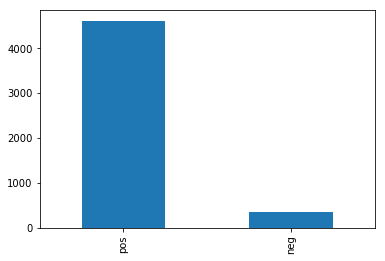

In [13]:
#let's count the reviews.
#i.e plotting bar graph in positive and negative ones.
senti["senti"].value_counts().plot.bar()

In [14]:
#As we can see data is unbalanced so this will create problem for model but, will take this data as it is and will predict our reviews.
#let's clean the text.
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["Text"].apply(cleanup)
check["Summary_Clean"] = check["Text"].apply(cleanup)


/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
#now let's split train and test dataset.
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [16]:
#Feature Extracter for NLTK Naive bayes classifier
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features


In [17]:
train["words"] = train["Summary_Clean"].str.lower().str.split()

In [18]:
test["words"] = test["Summary_Clean"].str.lower().str.split()

In [19]:
check["words"] = check["Summary_Clean"].str.lower().str.split()

/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
train.index = range(train.shape[0])

In [21]:
test.index = range(test.shape[0])

In [22]:
check.index = range(check.shape[0])

In [23]:
prediction =  {} ## For storing results of different classifiers

In [24]:
train_naive = []
test_naive = []
check_naive = []

In [25]:
for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]

In [26]:
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]

In [27]:
classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.32060301507537686
Most Informative Features
               incorrect = True              neg : pos    =     27.7 : 1.0
                 methods = True              neg : pos    =     19.8 : 1.0
                  reward = True              neg : pos    =     19.8 : 1.0
             glucosamine = True              neg : pos    =     19.8 : 1.0
                 uniform = True              neg : pos    =     19.8 : 1.0


In [28]:
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1

/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [29]:
#Now we are bulding Countvector and Tfidf vector for train , test ,check data
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)




/home/dharmendra/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [30]:
#Fitiing Multinomial NB
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.9447236180904522


/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [31]:
#Fitiing Bernouli NB
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating


Bernoulli Accuracy : 0.9226130653266331


/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [32]:
#Fitiing LogisticRegression
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating


Logistic Regression Accuracy : 0.9376884422110553


/home/dharmendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
#Getting most occuring words in train set
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
11489,merchandise,-9.972331
9391,inconsistent,-9.333394
9151,hot chocolate,-9.259480
6484,family loves,-9.004273
5365,dogs love,-8.972515
7103,flavor taste,-8.622569
15212,re good,-8.594993
17988,supermarkets,-8.517197
10430,little expensive,-8.349026
2786,ca,-8.111524


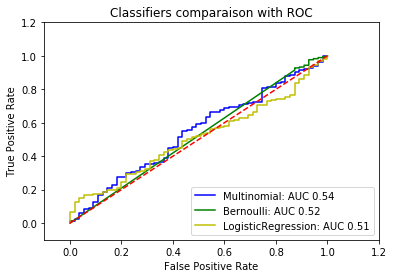

In [34]:
#Lets find out which classifier is doing what
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )

In [36]:
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:
             precision    recall  f1-score   support

   positive       0.00      0.00      0.00        55
   negative       0.94      1.00      0.97       940

avg / total       0.89      0.94      0.92       995



 Bernoulli:
             precision    recall  f1-score   support

   positive       0.13      0.07      0.09        55
   negative       0.95      0.97      0.96       940

avg / total       0.90      0.92      0.91       995



 LogisticRegression:
             precision    recall  f1-score   support

   positive       0.00      0.00      0.00        55
   negative       0.94      0.99      0.97       940

avg / total       0.89      0.94      0.91       995





/home/dharmendra/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
#Let test our classifiers with some handwritten samples
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))
    
def test_sample_new(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))
    return result

test_sample(logreg, "The product was good and easy to  use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")


Sample estimated as POS: negative prob 0.000579, positive prob 0.999421
Sample estimated as POS: negative prob 0.011705, positive prob 0.988295
Sample estimated as POS: negative prob 0.438586, positive prob 0.561414


/home/dharmendra/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [45]:
n=input()
t=test_sample_new(logreg, n)

i love these socks
Sample estimated as POS: negative prob 0.000005, positive prob 0.999995


/home/dharmendra/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [47]:
type(t)

str

In [191]:
#Here is predicted valuesof classifiers for check on the basis of review text
check

,reviews.rating,Text,UserId,Summary,Summary_Clean,words,Naive,multi,Bill,log
0,NaN,I find many K-Cups are weak and not what I am ...,A13PNJP7MSZ5FJ,Love this coffee,i find many k cups are weak and not what i am ...,"[i, find, many, k, cups, are, weak, and, not, ...",pos,pos,pos,pos
1,NaN,"If you love super dark, rich, bold and thick f...",A1SP0JKOZLVYNG,Tastes like...,if you love super dark rich bold and thick fla...,"[if, you, love, super, dark, rich, bold, and, ...",neg,pos,pos,pos
2,NaN,"<a href=""http://www.amazon.com/gp/product/B000...",A3M8R4JD1SIS76,Yummy Cookies,a href http www amazon com gp product b f z ws...,"[a, href, http, www, amazon, com, gp, product,...",neg,pos,pos,pos
3,NaN,It's very nice that the company put 100 calori...,A2HQ8RTAJYEUJO,3.5* snack for a non-chocophile,it s very nice that the company put calories p...,"[it, s, very, nice, that, the, company, put, c...",neg,pos,pos,pos
4,NaN,I enjoy them a lot and so does my son. I have ...,A2N17DHJPYFXGI,Peanut Butter Cookies,i enjoy them a lot and so does my son i have t...,"[i, enjoy, them, a, lot, and, so, does, my, so...",pos,pos,pos,pos
5,NaN,"I enjoy the Peanut Butter Cookie Crisp, but th...",A2PSIP48R289X0,Good buy,i enjoy the peanut butter cookie crisp but the...,"[i, enjoy, the, peanut, butter, cookie, crisp,...",neg,pos,pos,pos
6,NaN,One reviewer writes that these are Oreo cracke...,A2R6RA8FRBS608,The portable and edible Oreo,one reviewer writes that these are oreo cracke...,"[one, reviewer, writes, that, these, are, oreo...",neg,pos,pos,pos
7,NaN,I really like these. They are so light and ai...,A2YB7DLC3FOR7W,Very good snack!,i really like these they are so light and airy...,"[i, really, like, these, they, are, so, light,...",pos,pos,pos,pos
8,NaN,These are good but the flavor did not resemble...,A3DOPYDOS49I3T,These are ok.....,these are good but the flavor did not resemble...,"[these, are, good, but, the, flavor, did, not,...",pos,pos,pos,pos
9,NaN,I have been eating the 100 Calorie Chip Ahoy f...,A213XTQ2GX3HWD,Very Good,i have been eating the calorie chip ahoy for s...,"[i, have, been, eating, the, calorie, chip, ah...",neg,pos,pos,pos


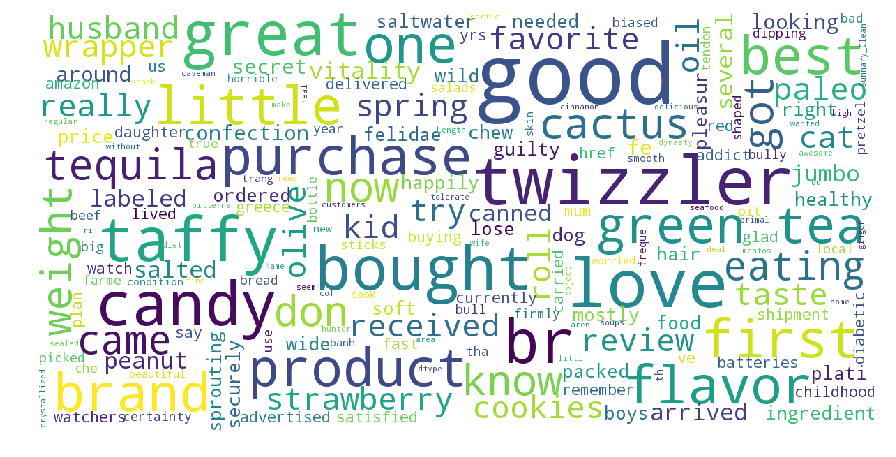

In [192]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(senti["Summary_Clean"])


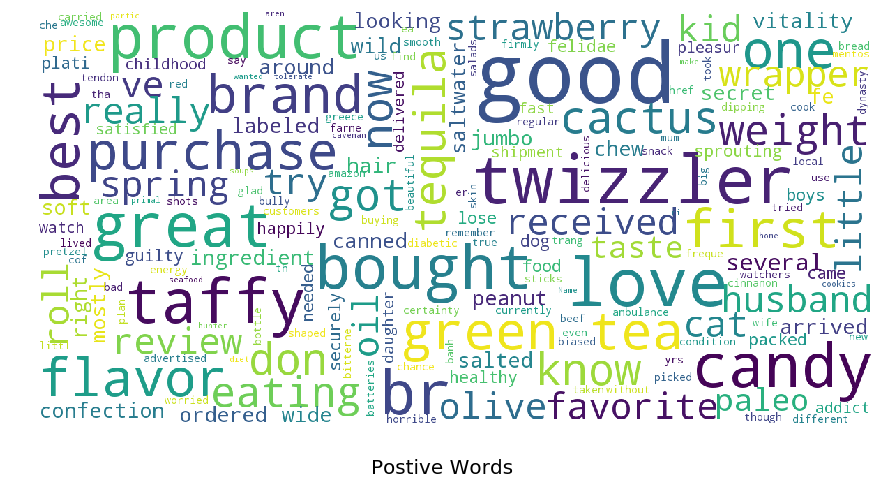

In [193]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "pos"] , title="Postive Words")

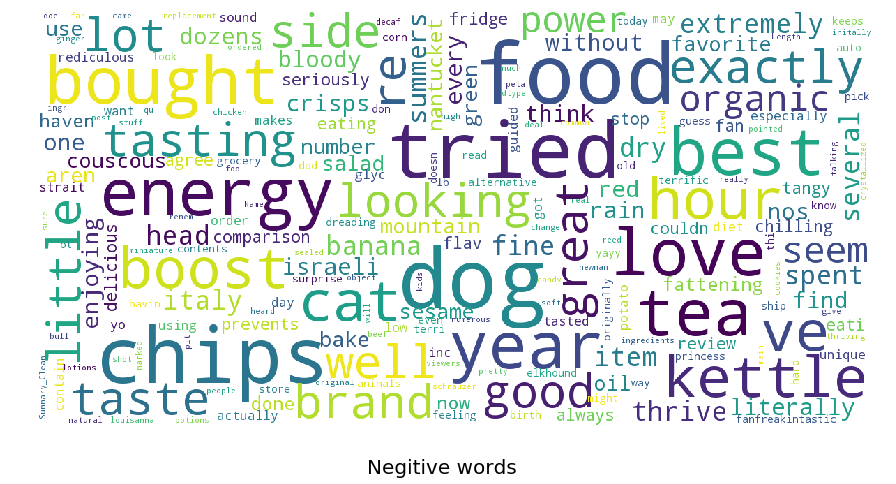

In [194]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "neg"] , title="Negitive words")

In [195]:
len(senti['Text'])

4977

In [196]:
#now let's convert sentiments into text documents
posi_sentiments=[]
neg_sentiments=[]
positive_summaries=[]
negative_summaries=[]
text=[]
ratings=[]
summaries=[]
for i in senti['Text']:
    text.append(i)
len(text)

4977

In [197]:
for i in senti['reviews.rating']:
    ratings.append(i)
len(ratings)

4977

In [198]:
for i in senti['Summary']:
    summaries.append(i)
len(summaries)

4977

In [199]:
for i in range(len(text)):
    if ratings[i]>=4:
        posi_sentiments.append(text[i])
        positive_summaries.append(summaries[i])
    else:
        neg_sentiments.append(text[i])
        negative_summaries.append(summaries[i])
print(len(posi_sentiments))
print(len(neg_sentiments))

4613
364


In [201]:
#writing negative text file.
with open('/home/dharmendra/Desktop/desk/captsone/senti_outputs/neg_senti.txt', 'w') as f:
    for item in neg_sentiments:
        f.write("%s\n" % item)

In [202]:
#writing posit text file.
with open('/home/dharmendra/Desktop/desk/captsone/senti_outputs/pos_senti.txt', 'w') as f:
    for item in posi_sentiments:
        f.write("%s\n" % item)

In [203]:
#now let's check size of the files.
import os
os.path.getsize('/home/dharmendra/Desktop/desk/captsone/senti_outputs/neg_senti.txt') #output is in bytes

158775

In [204]:
os.path.getsize('/home/dharmendra/Desktop/desk/captsone/senti_outputs/pos_senti.txt') #output is in bytes

1862496

In [205]:
#let's create csv file for 
with open('/home/dharmendra/Desktop/desk/captsone/senti_outputs/neg_senti.txt') as f:
    neg_texts = f.read().splitlines()
neg_texts[:3]

['In the 1980s I spent several summers in Italy. This biscotti is often given as a breakfast food or mid-day snack. They are simple and delicious and were not sold in the US back then. They are so good that I brought back two bags from a recent trip to Italy. It is great to see that they may now be found on Amazon!<br /><br />Note: it is great to open a bag, smell the contents, pour a glass of milk, then dip the Macines in the milk. Great routine and treat for kids!',
 'Our cats thrive extremely well on this dry cat food.  They definitely have much less hair ball throw ups and their fur is great.  They are fit and not over weight.  This vendor ships extremely fast.  Is one of the top Amazon suppliers in our book!',
 'The item over all was fine, but the Banana Heads are not just like Banana Runts they are alot smaller. Also when I received the item, the packaging was not great. The Banana Heads had come open during shipping and were all over the packing envelope.']

In [211]:
import csv

with open('/home/dharmendra/Desktop/desk/captsone/senti_outputs/negative_csv.csv', 'w', encoding="utf-8", newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(("Negative_Texts", "Negative_Summaries"))
    wr.writerows(zip(neg_texts,negative_summaries))